# Install and Import Libraries

In [1]:
# Install yfinance if not already installed
!pip install yfinance

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     ------ --------------------------------- 0.5/3.0 MB 1.0 MB/s eta 0:00:03
     ------ --------------------------------- 0.5/3.0 MB 1.0 MB/s eta 0:00:03
     ------ --------------------------------- 0.5/3.0 MB 1.0 MB/s eta 0:00:03
     ---------- ----------------------------- 0.8/3.0 MB 568.6 kB/s eta 0:00:04
     ------------- -------------------------- 1.0/3.0 MB 680.3 kB/s eta 0:00:03
     --

# Load Historical Stock Data

In [2]:
# Select the stock symbol and period
stock_symbol = "AAPL"  # Apple
data = yf.download(stock_symbol, start="2020-01-01", end="2025-11-28")

# Show first 5 rows
print(data.head())


C:\Users\PMLS\AppData\Local\Temp\ipykernel_20692\2033486964.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start="2020-01-01", end="2025-11-28")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.468239  72.528559  71.223237  71.476577  135480400
2020-01-03  71.763718  72.523746  71.539330  71.696160  146322800
2020-01-06  72.335556  72.374162  70.634539  70.885472  118387200
2020-01-07  71.995354  72.600960  71.775789  72.345204  108872000
2020-01-08  73.153481  73.455080  71.698566  71.698566  132079200


# Prepare Features and Target

In [3]:
# Create target column "Next_Close" (Close price of next day)
data['Next_Close'] = data['Close'].shift(-1)

# Drop the last row since it has NaN target
data = data.dropna()

# Select features and target
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Next_Close']

print(X.head())
print(y.head())


Price            Open       High        Low     Volume
Ticker           AAPL       AAPL       AAPL       AAPL
Date                                                  
2020-01-02  71.476577  72.528559  71.223237  135480400
2020-01-03  71.696160  72.523746  71.539330  146322800
2020-01-06  70.885472  72.374162  70.634539  118387200
2020-01-07  72.345204  72.600960  71.775789  108872000
2020-01-08  71.698566  73.455080  71.698566  132079200
Date
2020-01-02    71.763718
2020-01-03    72.335556
2020-01-06    71.995354
2020-01-07    73.153481
2020-01-08    74.707336
Name: Next_Close, dtype: float64


# Split Data into Train and Test Sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Train the Model

In [5]:
# Use Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Make Predictions

In [6]:
y_pred = model.predict(X_test)


# Evaluate the Model

In [7]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 2.3560021587795728
Root Mean Squared Error (RMSE): 3.2943707793663832


# Plot Actual vs Predicted Prices

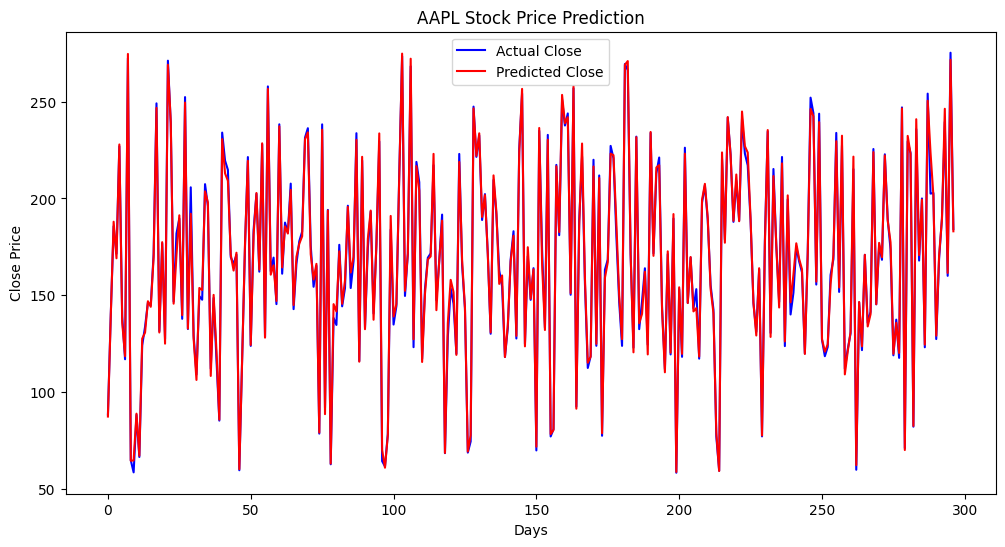

In [8]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual Close", color='blue')
plt.plot(y_pred, label="Predicted Close", color='red')
plt.title(f"{stock_symbol} Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.show()
